In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import os
import datetime
import folium
from folium.plugins import HeatMap, MarkerCluster


plt.style.use('ggplot')
plt.rc('figure', figsize=(12,6))

In [3]:
df = pd.read_csv(r'data_mmda_traffic_spatial.csv')
df.head()

,Date,Time,City,Location,Latitude,Longitude,High_Accuracy,Direction,Type,Lanes_Blocked,Involved,Tweet,Source
0,2018-08-20,7:55 AM,Pasig City,ORTIGAS EMERALD,14.586343,121.061481,1,EB,VEHICULAR ACCIDENT,1.0,TAXI AND MC,MMDA ALERT: Vehicular accident at Ortigas Emer...,https://twitter.com/mmda/status/10313302019705...
1,2018-08-20,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,1,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/10313462477459...
2,2018-08-20,9:13 AM,Makati City,EDSA ROCKWELL,14.559818,121.040737,1,SB,VEHICULAR ACCIDENT,1.0,SUV AND L300,MMDA ALERT: Vehicular accident at EDSA Rockwel...,https://twitter.com/mmda/status/10313589669896...
3,2018-08-20,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,1,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/10313590696535...
4,2018-08-20,10:27 AM,San Juan,ORTIGAS CLUB FILIPINO,14.601846,121.046754,1,EB,VEHICULAR ACCIDENT,1.0,2 CARS,MMDA ALERT: Vehicular accident at Ortigas Club...,https://twitter.com/mmda/status/10313711248424...


In [4]:
df['Timestamp'] = df['Date'] + ' ' + df['Time']
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['High_Accuracy'] = df['High_Accuracy'].astype(int)
df.replace('None', np.nan, inplace=True)
df.head()

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname M identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PA identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,Date,Time,City,Location,Latitude,Longitude,High_Accuracy,Direction,Type,Lanes_Blocked,Involved,Tweet,Source,Timestamp
0,2018-08-20,7:55 AM,Pasig City,ORTIGAS EMERALD,14.586343,121.061481,1,EB,VEHICULAR ACCIDENT,1.0,TAXI AND MC,MMDA ALERT: Vehicular accident at Ortigas Emer...,https://twitter.com/mmda/status/10313302019705...,2018-08-20 07:55:00
1,2018-08-20,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,1,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/10313462477459...,2018-08-20 08:42:00
2,2018-08-20,9:13 AM,Makati City,EDSA ROCKWELL,14.559818,121.040737,1,SB,VEHICULAR ACCIDENT,1.0,SUV AND L300,MMDA ALERT: Vehicular accident at EDSA Rockwel...,https://twitter.com/mmda/status/10313589669896...,2018-08-20 09:13:00
3,2018-08-20,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,1,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/10313590696535...,2018-08-20 08:42:00
4,2018-08-20,10:27 AM,San Juan,ORTIGAS CLUB FILIPINO,14.601846,121.046754,1,EB,VEHICULAR ACCIDENT,1.0,2 CARS,MMDA ALERT: Vehicular accident at Ortigas Club...,https://twitter.com/mmda/status/10313711248424...,2018-08-20 10:27:00


Text(0.5, 1.0, '7 Day Rolling Average of Daily Incidents')

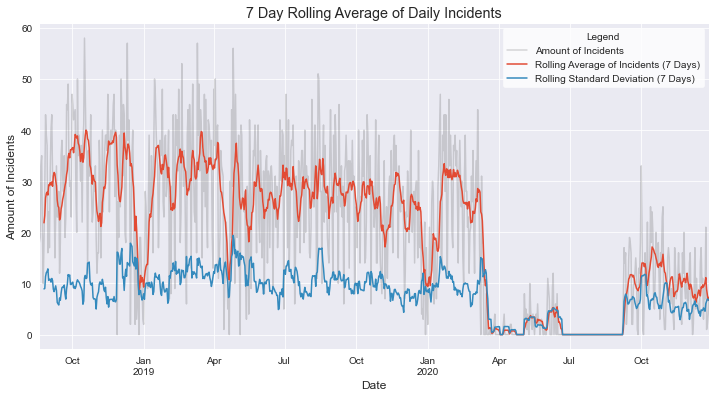

In [5]:
df_date = df.groupby(pd.Grouper(key='Timestamp', freq="D")).count()

df_date = df_date.reset_index()
df_date.drop(['Date','Time','Location','Latitude','Longitude','Direction','Lanes_Blocked',
              'Involved','Tweet','Type'], axis=1,inplace=True)
df_date = df_date.rename(columns={'Source': 'y'})


df_date_rolling = df_date
df_date_rolling.set_index('Timestamp',inplace=True)
df_date_rolling['roll7_avg'] = df_date_rolling['y'].rolling(7).mean()
df_date_rolling['roll7_std'] = df_date_rolling['y'].rolling(7).std()
df_date.reset_index(inplace=True)
df_date_rolling = df_date_rolling.set_index('Timestamp')


sns.set_style('darkgrid')
df_date_rolling['y'].plot(alpha=0.15,color='black')
df_date_rolling['roll7_avg'].plot()
df_date_rolling['roll7_std'].plot()
plt.xlabel('Date')
plt.ylabel('Amount of Incidents')
L = plt.legend(frameon=True)
L.set_title('Legend')

frame = L.get_frame()
frame.set_color('white')
L.get_texts()[0].set_text('Amount of Incidents')
L.get_texts()[1].set_text('Rolling Average of Incidents (7 Days)')
L.get_texts()[2].set_text('Rolling Standard Deviation (7 Days)')
plt.title('7 Day Rolling Average of Daily Incidents')

Text(0, 0.5, 'Amount of Incidents Per Hour')

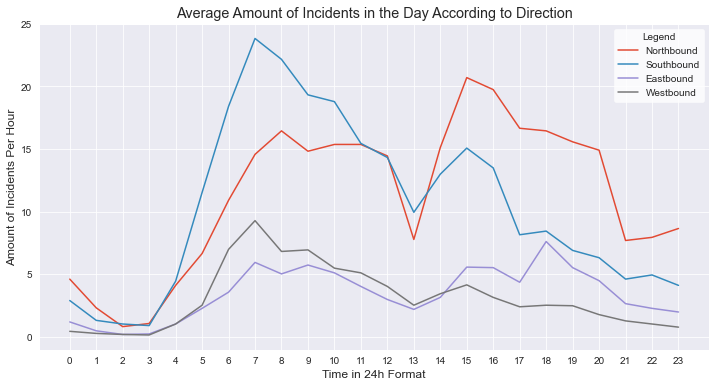

In [6]:
def subset_by_direction(df, direction):
    df_subset = df.dropna(subset=['Direction'])
    df_subset = df_subset[df_subset['Direction'].str.contains(direction)]
    df_subset = df_subset['Timestamp'].dt.hour.value_counts()
    df_subset = df_subset.rename_axis('Hour').reset_index(name=f'Amount_{direction}')
    df_subset = df_subset.sort_values(by='Hour')
    df_subset['Hour'] = df_subset['Hour'].astype(int)
    df_subset = df_subset.reset_index(drop=True)
    df_subset.set_index('Hour',inplace=True)
    return df_subset

df_sb = subset_by_direction(df, 'SB')
df_nb = subset_by_direction(df, 'NB')
df_eb = subset_by_direction(df, 'EB')
df_wb = subset_by_direction(df, 'WB')

df_direction = pd.concat([df_nb, df_sb, df_eb, df_wb],axis=1)


df_direction['Amount_NB'] = df_direction['Amount_NB'] / len(df_direction)
df_direction['Amount_SB'] = df_direction['Amount_SB'] / len(df_direction)
df_direction['Amount_EB'] = df_direction['Amount_EB'] / len(df_direction)
df_direction['Amount_WB'] = df_direction['Amount_WB'] / len(df_direction)


df_direction.plot()
plt.xticks(np.arange(0, 24, step=1))
plt.title('Average Amount of Incidents in the Day According to Direction')
L = plt.legend(frameon=True)
L.set_title('Legend')

frame = L.get_frame()
frame.set_color('white')
L.get_texts()[0].set_text('Northbound')
L.get_texts()[1].set_text('Southbound')
L.get_texts()[2].set_text('Eastbound')
L.get_texts()[3].set_text('Westbound')
plt.xlabel('Time in 24h Format')
plt.ylabel('Amount of Incidents Per Hour')